
# **ROLL NO: 80**
# **GROUP: A10**
# **PROJECT: CRYPTOCURRENCY PRICE PREDICTION USING GRU**


## **GRU is a type of recurrent neural network (RNN) that excels in processing and understanding sequential data. It is an advanced form of RNN, designed to overcome some of its limitations.**

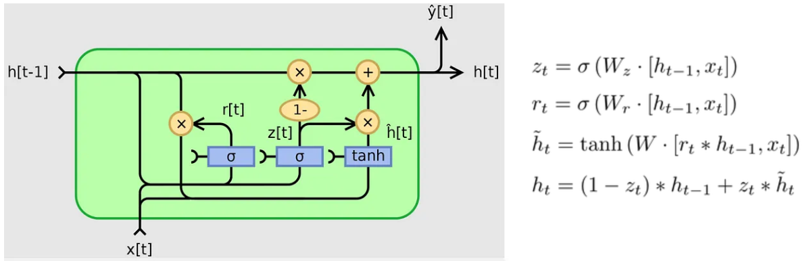

## **The reset gate r[t] is used to decide how much of the past information to forget, z[t] is a update gating vector that determines how much of the past information should be passed along to the future.**

# **Step 1: Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import Dense, Dropout,GRU
from keras import optimizers

seed = 1234
np.random.seed(seed)
plt.style.use('ggplot')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# **Step 2: Loading the Dataset**
# Bitcoin dataset time period: 2021-2023 (2 years)

In [ ]:
#Phase 1 of the project

from google.colab import files


uploaded = files.upload()

Saving BTC-USD (2 Years).csv to BTC-USD (2 Years).csv


In [ ]:
#using pandas for reading csv files
#maindf will read the data from csv and will store it
import io
dataraw = pd.read_csv('BTC-USD (2 Years).csv',index_col='Date', parse_dates=['Date'])

In [ ]:
dataraw.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-02,36699.921875,38231.339844,35966.308594,37575.179688,37575.179688,33070867190
2021-06-03,37599.410156,39478.953125,37243.972656,39208.765625,39208.765625,35460750427
2021-06-04,39242.484375,39242.484375,35717.722656,36894.406250,36894.406250,41831090187
2021-06-05,36880.156250,37917.714844,34900.414063,35551.957031,35551.957031,35959473399
2021-06-06,35538.609375,36436.421875,35304.578125,35862.378906,35862.378906,28913440585


In [ ]:
dataraw.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-29,28075.591797,28432.039063,27563.876953,27745.884766,27745.884766,15181308984
2023-05-30,27745.123047,28044.759766,27588.501953,27702.349609,27702.349609,13251081851
2023-05-31,27700.529297,27831.677734,26866.453125,27219.658203,27219.658203,15656371534
2023-06-01,27218.412109,27346.105469,26671.720703,26819.972656,26819.972656,14678970415
2023-06-02,26816.748047,27198.091797,26574.644531,27064.306641,27064.306641,14575899648


In [ ]:
dataraw.describe()

,Open,High,Low,Close,Adj Close,Volume
count,731.000000,731.000000,731.000000,731.000000,731.000000,7.310000e+02
mean,33076.785974,33788.421480,32288.925220,33058.694303,33058.694303,2.940040e+10
std,12884.056212,13206.085036,12512.452483,12876.508708,12876.508708,1.161006e+10
min,15782.300781,16253.047852,15599.046875,15787.284180,15787.284180,7.044911e+09
25%,21528.958985,21803.812500,20959.862305,21531.104492,21531.104492,2.148809e+10
50%,29796.285156,30470.302734,29154.849609,29799.080078,29799.080078,2.857563e+10
75%,42522.302735,43394.701172,41681.138672,42519.353516,42519.353516,3.536698e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,1.189925e+11


## **Step 3:  FEATURE SELECTION**

 Count row of data:  731


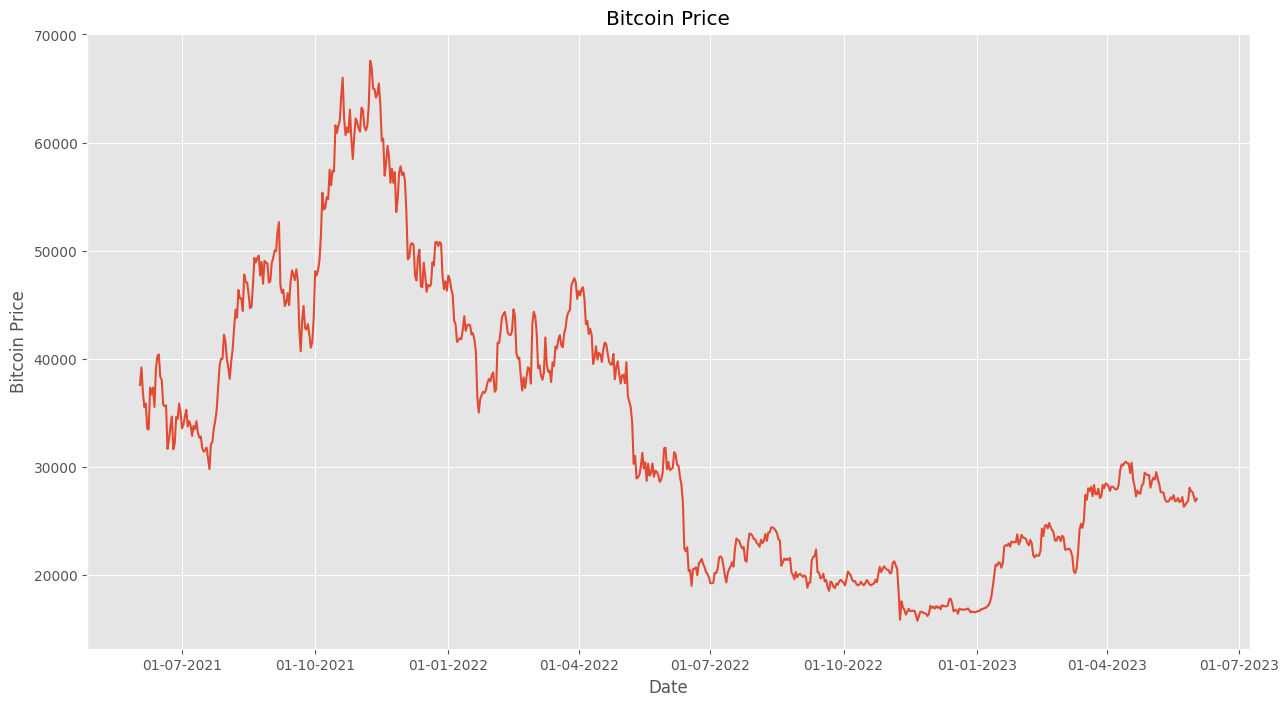

In [ ]:
# use feature 'Date' & 'Close'
dataset = pd.DataFrame(dataraw['Close'])
print(' Count row of data: ',len(dataset))

fig = plt.figure(figsize=(15, 8))
plt.plot(dataset)
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.title('Bitcoin Price')
plt.show()

# **Step 4: Preprocessing Data**

# **Normalization Min-Max**

In [ ]:
#Min-Max Normalization
dataset_norm = dataset.copy()
dataset[['Close']]
scaler = MinMaxScaler()
dataset_norm['Close'] = scaler.fit_transform(dataset[['Close']])
dataset_norm

,Close
Date,
2021-06-02,0.420782
2021-06-03,0.452331
2021-06-04,0.407634
2021-06-05,0.381708
2021-06-06,0.387703
...,...
2023-05-29,0.230952
2023-05-30,0.230111
2023-05-31,0.220789


# **Step 5: Graph Data Normalized**

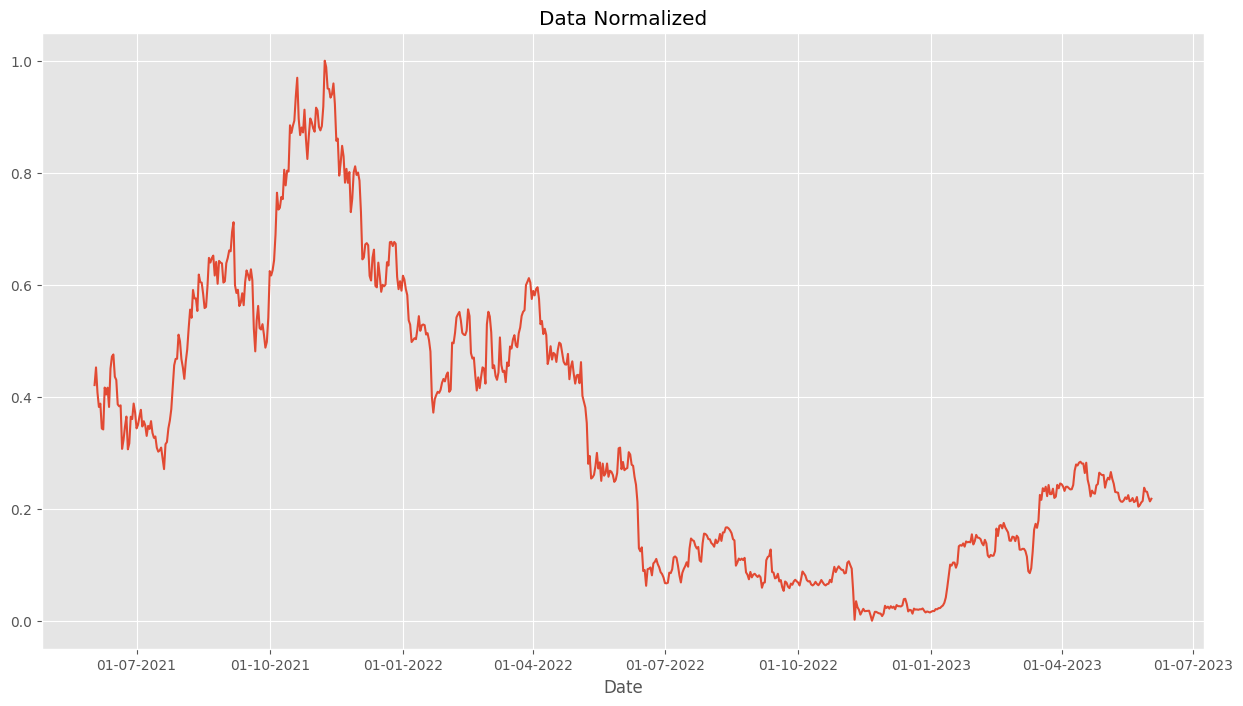

In [ ]:
fig = plt.figure(figsize=(15, 8))
plt.plot(dataset_norm)
plt.xlabel('Date')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.title('Data Normalized')
plt.show()

# **Step 6: Data Partition**

**70% Training , 30% Testing**

In [ ]:
# Partition data into data train, val & test
totaldata = dataset.values
totaldatatrain = int(len(totaldata)*0.7) #70% training data
totaldataval = int(len(totaldata)*0.1) #10% validation data
totaldatatest = int(len(totaldata)*0.2) #20% testing data

# Store data into each partition
training_set = dataset_norm[0:totaldatatrain]
val_set=dataset_norm[totaldatatrain:totaldatatrain+totaldataval]
test_set = dataset_norm[totaldatatrain+totaldataval:]

# **Training Data Graph**

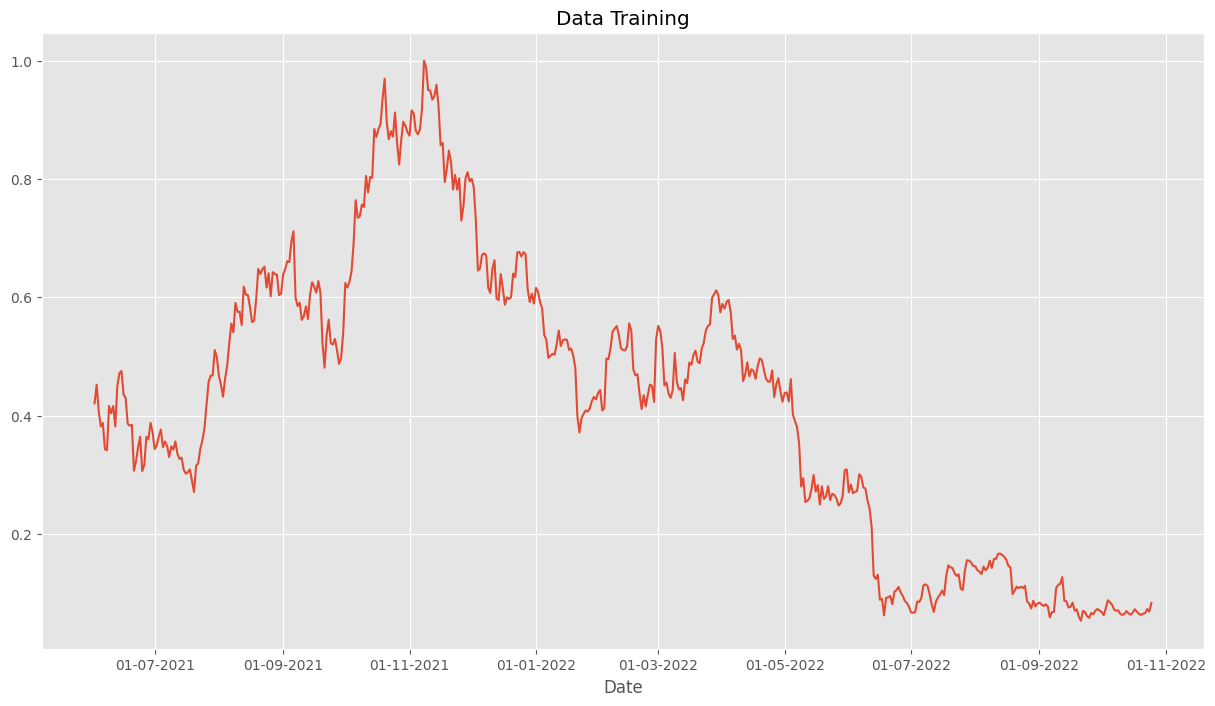

In [ ]:
# graph of data training
fig = plt.figure(figsize=(15, 8))
plt.plot(training_set)
plt.xlabel('Date')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.title('Data Training')
plt.show()

# **Data Validation Graph**

,Close
Date,
2022-10-26,0.096238
2022-10-27,0.086879
2022-10-28,0.092857
2022-10-29,0.097166
2022-10-30,0.093634
...,...
2023-01-02,0.017404
2023-01-03,0.017238
2023-01-04,0.020780


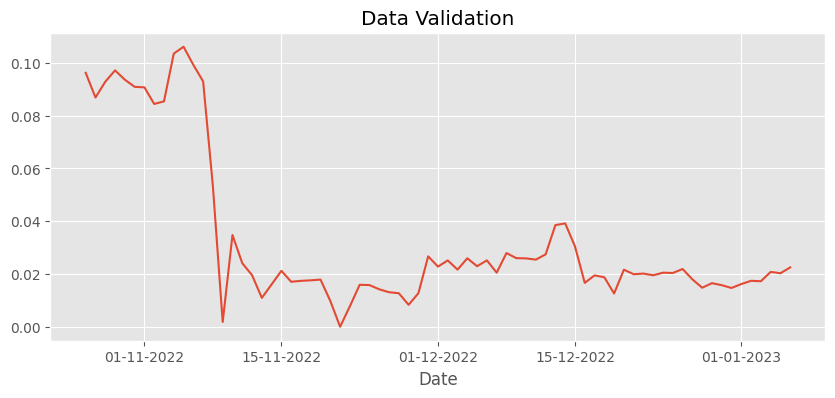

In [ ]:
# graph of data validation
fig = plt.figure(figsize=(10, 4))
plt.plot(val_set)
plt.xlabel('Date')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.title('Data Validation')
val_set

# **Data Test Graph**

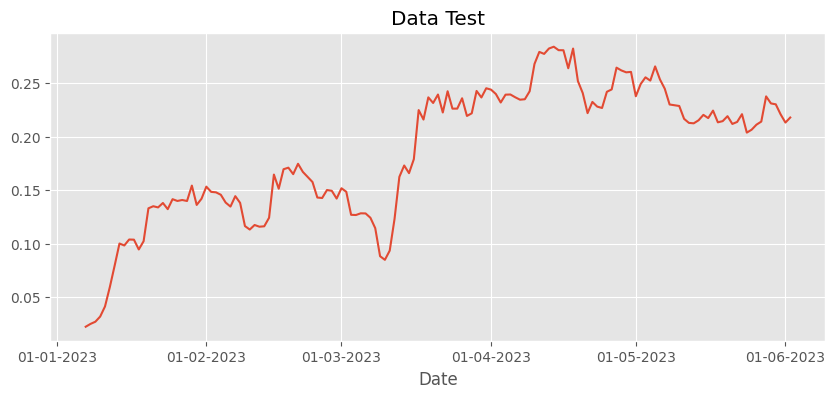

,Close
Date,
2023-01-07,0.022553
2023-01-08,0.025181
2023-01-09,0.027217
2023-01-10,0.032040
2023-01-11,0.041476
...,...
2023-05-29,0.230952
2023-05-30,0.230111
2023-05-31,0.220789


In [ ]:
# graph of data test
fig = plt.figure(figsize=(10, 4))
plt.plot(test_set)
plt.xlabel('Date')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.title('Data Test')
plt.show()
test_set

## **Sliding Windows**

In [ ]:
# Initiaton value of lag
lag = 2
# sliding windows function
def create_sliding_windows(data,len_data,lag):
    x=[]
    y=[]
    for i in range(lag,len_data):
        x.append(data[i-lag:i,0])
        y.append(data[i,0])
    return np.array(x),np.array(y)

# Formating data into array for create sliding windows
array_training_set = np.array(training_set)
array_val_set = np.array(val_set)
array_test_set = np.array(test_set)

# Create sliding windows into training data
x_train, y_train = create_sliding_windows(array_training_set,len(array_training_set), lag)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
# Create sliding windows into validation data
x_val,y_val = create_sliding_windows(array_val_set,len(array_val_set),lag)
x_val = np.reshape(x_val, (x_val.shape[0],x_val.shape[1],1))
# Create sliding windows into test data
x_test,y_test = create_sliding_windows(array_test_set,len(array_test_set),lag)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

# **Step 7: GRU MODEL**

In [ ]:
# Hyperparameters
learning_rate = 0.0001
hidden_unit = 64
batch_size=256
epoch = 200

# Architecture Gated Recurrent Unit
regressorGRU = Sequential()

# First GRU layer with dropout
regressorGRU.add(GRU(units=hidden_unit, return_sequences=True, input_shape=(x_train.shape[1],1), activation = 'tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer with dropout
regressorGRU.add(GRU(units=hidden_unit, return_sequences=True, activation = 'tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer with dropout
regressorGRU.add(GRU(units=hidden_unit, return_sequences=False, activation = 'tanh'))
regressorGRU.add(Dropout(0.2))

# Output layer
regressorGRU.add(Dense(units=1))

# Compiling the Gated Recurrent Unit
#regressorGRU.compile(optimizer=optimizers.adam(lr=learning_rate),loss='mean_squared_error')
regressorGRU.compile(loss="mean_squared_error",optimizer="adam")

# Fitting ke data training dan data validation
pred = regressorGRU.fit(x_train, y_train, validation_data=(x_val,y_val), batch_size=batch_size, epochs=epoch)

Epoch 1/200
2/2 [==============================] - 9s 1s/step - loss: 0.2267 - val_loss: 7.4841e-04
Epoch 2/200
2/2 [==============================] - 0s 76ms/step - loss: 0.1754 - val_loss: 0.0026
Epoch 3/200
2/2 [==============================] - 0s 53ms/step - loss: 0.1304 - val_loss: 0.0082
Epoch 4/200
2/2 [==============================] - 0s 52ms/step - loss: 0.0886 - val_loss: 0.0193
Epoch 5/200
2/2 [==============================] - 0s 51ms/step - loss: 0.0507 - val_loss: 0.0381
Epoch 6/200
2/2 [==============================] - 0s 51ms/step - loss: 0.0295 - val_loss: 0.0656
Epoch 7/200
2/2 [==============================] - 0s 53ms/step - loss: 0.0252 - val_loss: 0.0944
Epoch 8/200
2/2 [==============================] - 0s 54ms/step - loss: 0.0355 - val_loss: 0.1061
Epoch 9/200
2/2 [==============================] - 0s 51ms/step - loss: 0.0400 - val_loss: 0.0963
Epoch 10/200
2/2 [==============================] - 0s 53ms/step - loss: 0.0346 - val_loss: 0.0762
Epoch 11/200
2/2 

# **Step 8: Graph Training loss & Validation Loss**

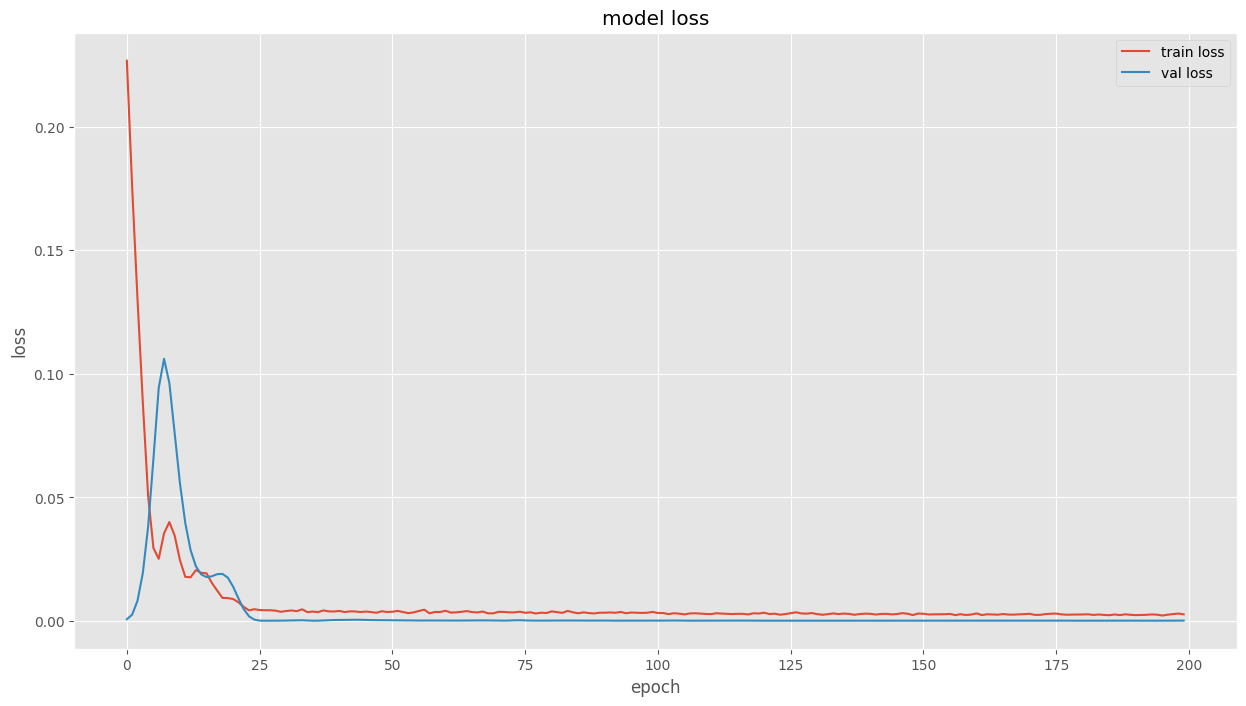

In [ ]:
# Graph model loss (train loss & val loss)
fig = plt.figure(figsize=(15, 8))
plt.plot(pred.history['loss'], label='train loss')
plt.plot(pred.history['val_loss'], label='val loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

# **Training Loss & Validation Loss Table**

In [ ]:
# Tabel value of training loss & validation loss
learningrate_parameter = learning_rate
train_loss=pred.history['loss'][-1]
validation_loss=pred.history['val_loss'][-1]
learningrate_parameter=pd.DataFrame(data=[[learningrate_parameter, train_loss, validation_loss]],
                                    columns=['Learning Rate', 'Training Loss', 'Validation Loss'])
learningrate_parameter.set_index('Learning Rate')

,Training Loss,Validation Loss
Learning Rate,,
0.0001,0.002727,0.000195


# **Implementation Model into Data Test**

In [ ]:
# Implementation model into data test
y_pred_test = regressorGRU.predict(x_test)

# Invert normalization min-max
y_pred_invert_norm = scaler.inverse_transform(y_pred_test)

5/5 [==============================] - 1s 4ms/step


# **Step 9: Comparison Data Test with Prediction Results**

In [ ]:
# Comparison data test with data prediction
datacompare = pd.DataFrame()
datatest=np.array(dataset['Close'][totaldatatrain+totaldataval+lag:])
datapred= y_pred_invert_norm

datacompare['Data Test'] = datatest
datacompare['Prediction Results'] = datapred
datacompare

,Data Test,Prediction Results
0,17196.554688,16587.525391
1,17446.292969,16714.800781
2,17934.896484,16871.923828
3,18869.587891,17208.314453
4,19909.574219,17859.138672
...,...,...
140,27745.884766,27005.949219
141,27702.349609,27692.789062
142,27219.658203,27452.878906
143,26819.972656,27255.685547


# **Step 10: Prediction Results Evaluation for GRU**

### **EVALUATION METRICES RMSE,MSE and MAE**

In [ ]:
print("Test data RMSE: ", math.sqrt(mean_squared_error(datatest,datapred)))
print("Test data MSE: ", mean_squared_error(datatest,datapred))
print("Test data MAE: ", mean_absolute_error(datatest,datapred))

Test data RMSE:  883.8145259824178
Test data MSE:  781128.1163375259
Test data MAE:  645.1901805543102


In [ ]:
# Calculatre value of Root Mean Square Error
def rmse(datatest, datapred):
    return np.round(np.sqrt(np.mean((datapred - datatest) ** 2)), 4)
print('Result Root Mean Square Error Prediction Model :',rmse(datatest, datapred))

def mape(datatest, datapred):
    return np.round(np.mean(np.abs((datatest - datapred) / datatest) * 100), 4)

print('Result Mean Absolute Percentage Error Prediction Model : ', mape(datatest, datapred), '%')

Result Root Mean Square Error Prediction Model : 4496.2183
Result Mean Absolute Percentage Error Prediction Model :  14.4278 %


# **Step 11: Graph - Actual vs. Predicted Data.**

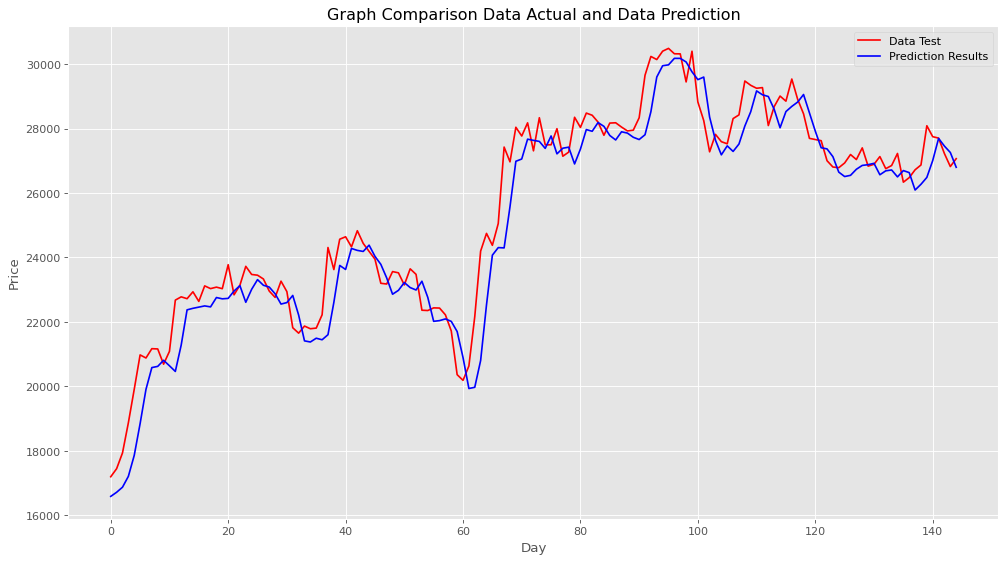

In [ ]:
# Create graph data test and prediction result
plt.figure(num=None, figsize=(15, 8), dpi=80,facecolor='w', edgecolor='k')
plt.title('Graph Comparison Data Actual and Data Prediction')
plt.plot(datacompare['Data Test'], color='red',label='Data Test')
plt.plot(datacompare['Prediction Results'], color='blue',label='Prediction Results')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()

# **In conclusion, GRU is a powerful deep learning model that holds great potential in cryptocurrency price prediction. Its ability to capture temporal dependencies and nonlinear relationships makes it a valuable tool for traders, investors, and researchers.**